In [1]:
import serial
import sys
import glob
import time
import serial.tools.list_ports
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import clear_output


ser = None

def serial_ports():
     result = []
     ports = serial.tools.list_ports.comports()
     for port, desc, hwid in sorted(ports):
          comm =  "{}: {}".format(port, desc)
          result.append(comm) 
     return result

def InitSerial(port, bps = 9600, to = 0):
    global ser
    try:
        ser = serial.Serial(port, bps, timeout = to)  # open serial port
        ser.flushInput()
        ser.flushOutput()
        return ser.name
    except Exception as e:
        return 'ERR: ' + str(e)

def CloseSerial():
    return('done')
    try:
        ser.flush()
        ser.close()
        return 'done'
    except Exception as e:
        return 'ERR: ' + str(e)    

def WriteSerial(string):
    try:
        reply = ser.write(string.encode())
        return str(reply)
    except Exception as e:
        return 'ERR: ' + str(e)    

def ReadSerial():
    try:
        reply = ''
        while ser.in_waiting:
            reply = reply + ser.readline().decode()
        return reply
    except Exception as e:
        return 'ERR: ' +  str(e)
    
def SendRead(string):
    if WriteSerial(string):
        time.sleep(0.1)
        return ReadSerial()
    
updatedPortList = []

def search_for_ports():
    updatedPortList = []
    serialPortList = serial_ports()
    for x in serialPortList:
        updatedPortList.append(x[:x.index(':')])
    return updatedPortList
    
def on_value_change(change):
    with output2:
        global SerialPort
        SerialPort = change['new']
        InitSerial(change['new'],115200)
        WriteSerial('\x03')
        run_some_code()
        
def run_some_code():
    code = '''
import hub,utime
    '''
    WriteSerial('\x05')
    WriteSerial(code)
    WriteSerial('\x04')
    WriteSerial('\x03')
    
    time.sleep(1) #wait for everything to get over there and read all the replies
    words = ReadSerial()
#     print(words)
    if (">>>" in words):
        print("You are now connected to SPIKE Prime!")
    else:
        print("Error, try reconnecting or connecting to a different serial port.")

In [ ]:
rotateFaceButton = widgets.Button(
    disabled=False,
    layout = Layout(height = '40px',width = '40px',margin = '0px 0px 0px 0px',padding = '0px 0px 0px 0px'),
    icon='rotate-right' # (FontAwesome names without the `fa-` prefix)
)
rotateFace = widgets.Output()
xAxisButton = widgets.Button(
    disabled=False,
    layout = rotateFaceButton.layout,
    icon='arrow-right' # (FontAwesome names without the `fa-` prefix)
)
xAxis = widgets.Output()
yAxisButton = widgets.Button(
    disabled=False,
    layout = rotateFaceButton.layout,
    icon='arrow-up' # (FontAwesome names without the `fa-` prefix)
    )
yAxis = widgets.Output()

In [ ]:
def controls():
    setModes = '''
import hub,utime
hub.port.A.motor.mode(1)
hub.port.A.motor.brake()
hub.port.B.motor.mode(1)
hub.port.B.motor.brake()
'''
    WriteSerial('\x05')
    WriteSerial(setModes)
    WriteSerial('\x04')    

In [1]:
!pip install Pillow


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
def displayCube():
    import PIL
    from PIL import Image, ImageDraw, ImageFont
    im = PIL.Image.new(mode = "RGB", size = (200, 200),
                           color = (153, 153, 255))
    display(im)

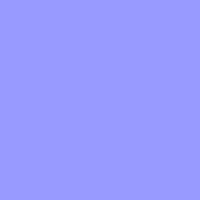

In [7]:
displayCube()